In [1]:
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import array
import requests
import json
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
from itertools import cycle, islice
from matplotlib import cm

In [2]:
audiofeature_path = "audiofeatures_df.csv"
audiofeature_dataframe = pd.read_csv(audiofeature_path)
audiofeature_dataframe


Genre  Popularity   Loudness       Tempo    Duration_ms  \
0             acoustic   31.770000 -10.109200  119.453410  236517.440000   
1             afrobeat   11.490000  -7.940680  119.634750  291627.600000   
2             alt-rock   28.150000  -7.046410  128.581140  242760.980000   
3          alternative   45.842105  -5.941326  120.900768  231153.905263   
4              ambient   18.400000 -19.527770  110.091350  328447.300000   
5                anime   20.140000  -4.455460  135.952480  256428.250000   
6          black-metal    7.190000  -6.813490  123.542380  324875.640000   
7            bluegrass   15.505051  -9.781606  133.751798  210418.222222   
8                blues   21.747475  -9.642364  125.206929  229666.888889   
9            bossanova    4.790000 -12.385550  114.219900  187438.670000   
10              brazil   28.420000  -8.661290  128.894290  226852.120000   
11           breakbeat    8.140000  -8.052600  133.064610  311586.210000   
12             british   39.102273  -6.880318  121.425977  231503.590909   
13            cantopop   14.300000  -8.598990  119.864260  242535.680000   
14       chicago-house    6.333333 -10.922101  121.946505  360109.888889   
15            children   34.622222  -8.512367  117.001944  195499.722222   
16               chill   46.315789  -8.398342  117.803434  252370.736842   
17           classical   30.410000 -22.932590  103.684540  372315.640000   
18                club   37.303030  -5.358333  125.614798  249106.757576   
19              comedy   28.000000  -9.256630   97.018330  265413.520000   
20             country   50.010000  -6.174940  126.604870  213840.120000   
21               dance   27.000000  -5.595928  126.848753  236357.577320   
22           dancehall   14.949495  -5.617879  117.312101  199574.989899   
23         death-metal   20.580000  -6.374010  118.821120  239453.860000   
24          deep-house   13.639175  -8.796351  120.574825  367359.876289   
25      detroit-techno    5.843750 -11.976562  127.032281  387337.187500   
26               disco   30.235955  -7.008584  119.608652  242140.404494   
27              disney   34.648352 -14.337121  115.539484  164232.758242   
28       drum-and-bass   10.480000  -4.962040  163.849080  306230.790000   
29                 dub   19.810526  -5.251600  134.619053  279605.873684   
..                 ...         ...        ...         ...            ...   
92              reggae   22.908163  -6.952388  109.507704  238638.693878   
93           reggaeton   28.721649  -5.575680  120.809598  236743.195876   
94           road-trip   36.585366  -7.578878  120.334976  236146.292683   
95                rock   56.478723  -6.064138  124.459936  240632.851064   
96         rock-n-roll   25.049180  -7.500213  128.825148  220736.606557   
97          rockabilly   18.123596  -7.127348  126.834011  166453.224719   
98             romance   40.153846  -7.445744  118.269872  238607.846154   
99                 sad   38.258621  -8.448224  127.394224  245115.672414   
100              salsa   28.202128  -6.336191  119.679904  286327.510638   
101              samba    8.061224  -9.881000  112.625133  219439.244898   
102          sertanejo   13.313131  -5.294909  125.315374  198603.626263   
103         show-tunes   30.784946 -11.449462  110.464570  204390.569892   
104  singer-songwriter   39.812500 -10.182562  117.535000  237093.125000   
105                ska   13.707071  -6.030131  129.065808  201748.707071   
106              sleep   32.942857 -12.125371  107.967829  263350.057143   
107         songwriter   26.322917 -10.990000  119.131531  248389.343750   
108               soul   25.206897  -8.421494  114.891966  222028.609195   
109        soundtracks   38.342105 -15.959447  103.129829  214053.921053   
110            spanish   36.397727  -5.887136  125.132409  224851.875000   
111              study   40.741935 -12.310677  112.059065  248767.967742   
112             summer   36.548387  -4.795774  119.141484  225467

In [4]:
duration_ms_list = audiofeature_dataframe['Duration_ms'].tolist()
duration_ms_list
Int = 10000
s_list = [x / Int for x in duration_ms_list]
duration_s_list = [round(s) for s in s_list]
duration_s_list

[24,
 29,
 24,
 23,
 33,
 26,
 32,
 21,
 23,
 19,
 23,
 31,
 23,
 24,
 36,
 20,
 25,
 37,
 25,
 27,
 21,
 24,
 20,
 24,
 37,
 39,
 24,
 16,
 31,
 28,
 29,
 26,
 26,
 28,
 23,
 24,
 22,
 21,
 24,
 23,
 34,
 30,
 11,
 24,
 26,
 28,
 22,
 27,
 15,
 28,
 28,
 23,
 19,
 21,
 30,
 29,
 31,
 24,
 23,
 29,
 27,
 29,
 25,
 27,
 25,
 29,
 22,
 18,
 23,
 23,
 26,
 26,
 27,
 23,
 42,
 23,
 22,
 29,
 24,
 22,
 24,
 25,
 25,
 22,
 27,
 22,
 34,
 27,
 19,
 20,
 24,
 25,
 24,
 24,
 24,
 24,
 22,
 17,
 24,
 25,
 29,
 22,
 20,
 20,
 24,
 20,
 26,
 25,
 22,
 21,
 22,
 25,
 23,
 23,
 23,
 20,
 33,
 38,
 28,
 25,
 22,
 27]

In [6]:
genre_duration = audiofeature_dataframe[["Genre","Duration_ms"]]
#grouped_regimen =regimen_and_MouseID.groupby(["Drug Regimen"])
#grouped_regimen=pd.DataFrame(grouped_regimen.count())
#grouped_regimen=grouped_regimen.sort_values("Timepoint",ascending =False)
genre_duration['Duration_s']= duration_s_list
genre_duration 

/Users/heesungshim/app/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Genre    Duration_ms  Duration_s
0             acoustic  236517.440000          24
1             afrobeat  291627.600000          29
2             alt-rock  242760.980000          24
3          alternative  231153.905263          23
4              ambient  328447.300000          33
5                anime  256428.250000          26
6          black-metal  324875.640000          32
7            bluegrass  210418.222222          21
8                blues  229666.888889          23
9            bossanova  187438.670000          19
10              brazil  226852.120000          23
11           breakbeat  311586.210000          31
12             british  231503.590909          23
13            cantopop  242535.680000          24
14       chicago-house  360109.888889          36
15            children  195499.722222          20
16               chill  252370.736842          25
17           classical  372315.640000          37
18                club  249106.757576          25
19              comedy  265413.520000          27
20             country  213840.120000          21
21               dance  236357.577320          24
22           dancehall  199574.989899          20
23         death-metal  239453.860000          24
24          deep-house  367359.876289          37
25      detroit-techno  387337.187500          39
26               disco  242140.404494          24
27              disney  164232.758242          16
28       drum-and-bass  306230.790000          31
29                 dub  279605.873684          28
..                 ...            ...         ...
92              reggae  238638.693878          24
93           reggaeton  236743.195876          24
94           road-trip  236146.292683          24
95                rock  240632.851064          24
96         rock-n-roll  220736.606557          22
97          rockabilly  166453.224719          17
98             romance  238607.846154          24
99                 sad  245115.672414          25
100              salsa  286327.510638          29
101              samba  219439.244898          22
102          sertanejo  198603.626263          20
103         show-tunes  204390.569892          20
104  singer-songwriter  237093.125000          24
105                ska  201748.707071          20
106              sleep  263350.057143          26
107         songwriter  248389.343750          25
108               soul  222028.609195          22
109        soundtracks  214053.921053          21
110            spanish  224851.875000          22
111              study  248767.967742          25
112             summer  225467.806452          23
113            swedish  231304.616162          23
114          synth-pop  229104.100000          23
115              tango  198020.280000          20
116             techno  331123.571429          33
117             trance  383839.793103          38
118           trip-hop  277787.522222          28
119            turkish  248682.824324          25
120           work-out  221917.888889          22
121        world-music  270259.731707          27

[122 rows x 3 columns]

In [7]:
genre_duration_s = genre_duration[["Genre","Duration_s"]]
genre_duration_s

Genre  Duration_s
0             acoustic          24
1             afrobeat          29
2             alt-rock          24
3          alternative          23
4              ambient          33
5                anime          26
6          black-metal          32
7            bluegrass          21
8                blues          23
9            bossanova          19
10              brazil          23
11           breakbeat          31
12             british          23
13            cantopop          24
14       chicago-house          36
15            children          20
16               chill          25
17           classical          37
18                club          25
19              comedy          27
20             country          21
21               dance          24
22           dancehall          20
23         death-metal          24
24          deep-house          37
25      detroit-techno          39
26               disco          24
27              disney          16
28       drum-and-bass          31
29                 dub          28
..                 ...         ...
92              reggae          24
93           reggaeton          24
94           road-trip          24
95                rock          24
96         rock-n-roll          22
97          rockabilly          17
98             romance          24
99                 sad          25
100              salsa          29
101              samba          22
102          sertanejo          20
103         show-tunes          20
104  singer-songwriter          24
105                ska          20
106              sleep          26
107         songwriter          25
108               soul          22
109        soundtracks          21
110            spanish          22
111              study          25
112             summer          23
113            swedish          23
114          synth-pop          23
115              tango          20
116             techno          33
117             trance          38
118           trip-hop          28
119            turkish          25
120           work-out          22
121        world-music          27

[122 rows x 2 columns]

/Users/heesungshim/app/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


<function matplotlib.pyplot.show(*args, **kw)>

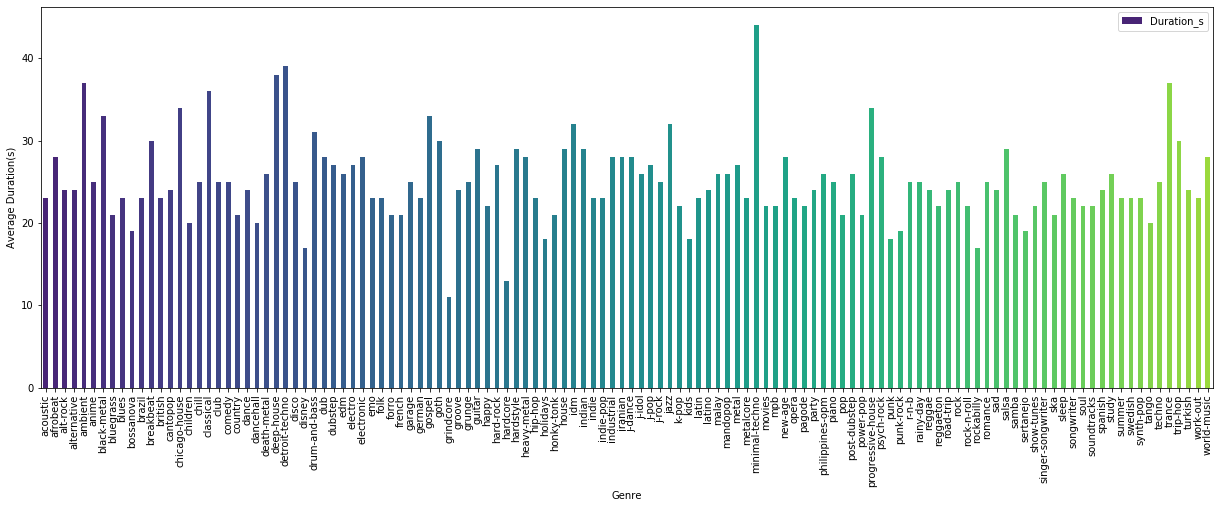

In [19]:

genre_duration_s = genre_duration[["Genre","Duration_s"]]
#genre_duration_s.plot(kind="bar",figsize=(20,5))
#my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(genre_duration_s)))
#my_colors = [(n/10.0, n/20.0, 0.75) for n in range(len(genre_duration_s))]
#my_colors
#color = cm.inferno_r(np.linspace(0.1, 0.9, 130))
color = cm.viridis(np.linspace(0.1, 0.9, 130))
#color
ax = genre_duration_s.plot.bar(x='Genre', y='Duration_s', rot=0,figsize=(21,7),color = color )
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel("Average Duration(s)")
plt.show




<function matplotlib.pyplot.show(*args, **kw)>

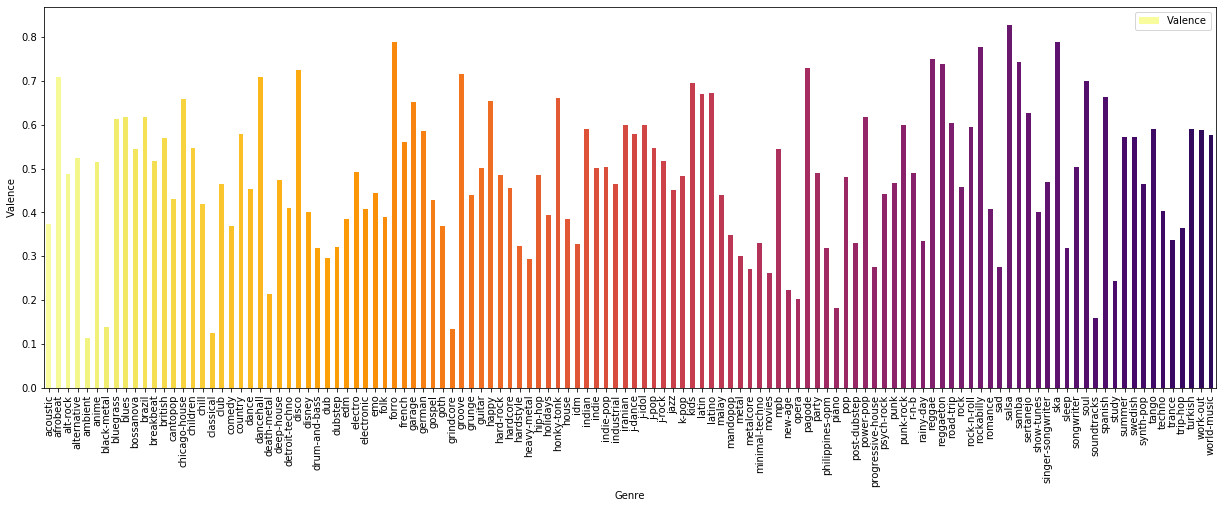

In [13]:
genre_population=audiofeature_dataframe[["Genre","Valence"]]
color = cm.inferno_r(np.linspace(0.01, 0.9, 130))
#color
ax = genre_population.plot.bar(x='Genre', y='Valence', rot=0,figsize=(21,7),color = color )
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel("Valence")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

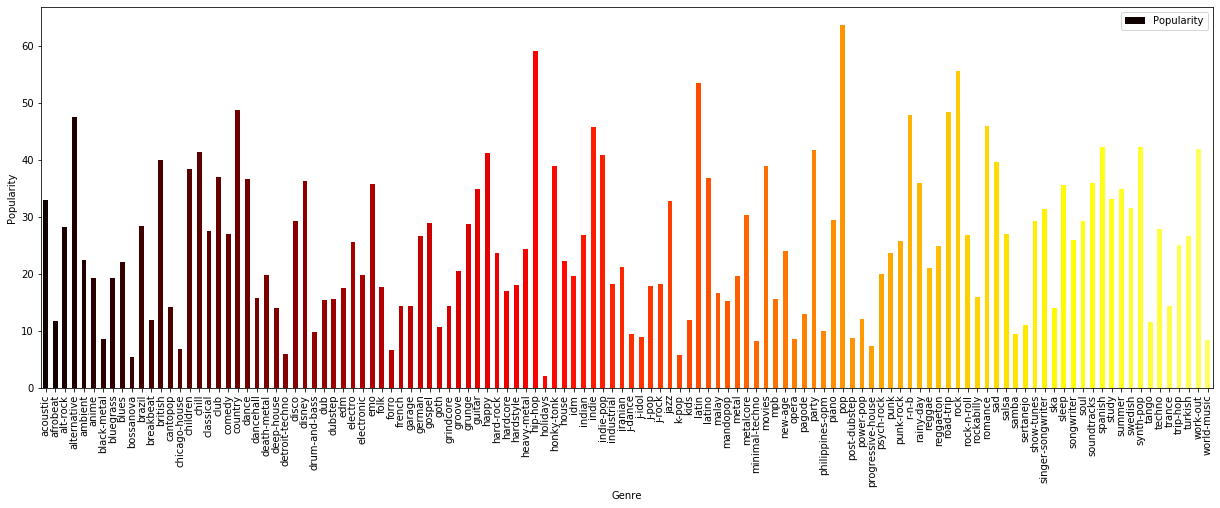

In [26]:
genre_population=audiofeature_dataframe[["Genre","Popularity"]]
color = cm.hot(np.linspace(0.01, 0.9, 130))
#color
ax = genre_population.plot.bar(x='Genre', y='Popularity', rot=0,figsize=(21,7),color = color )
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel("Popularity")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

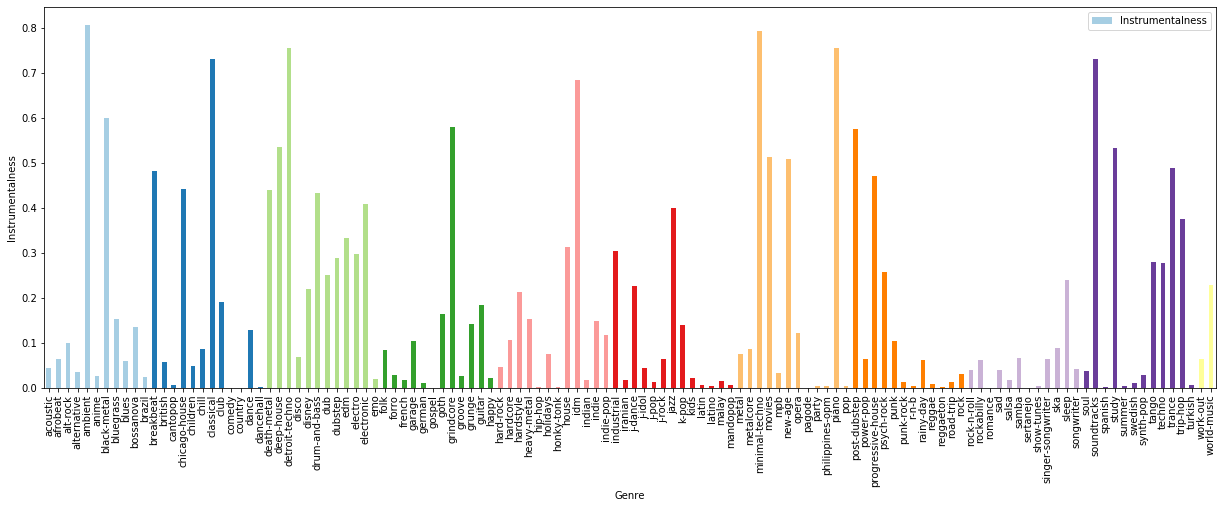

In [22]:
genre_population=audiofeature_dataframe[["Genre","Instrumentalness"]]
color = cm.Paired(np.linspace(0.01, 0.9, 130))
#color
ax = genre_population.plot.bar(x='Genre', y='Instrumentalness', rot=0,figsize=(21,7),color = color )
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel("Instrumentalness")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

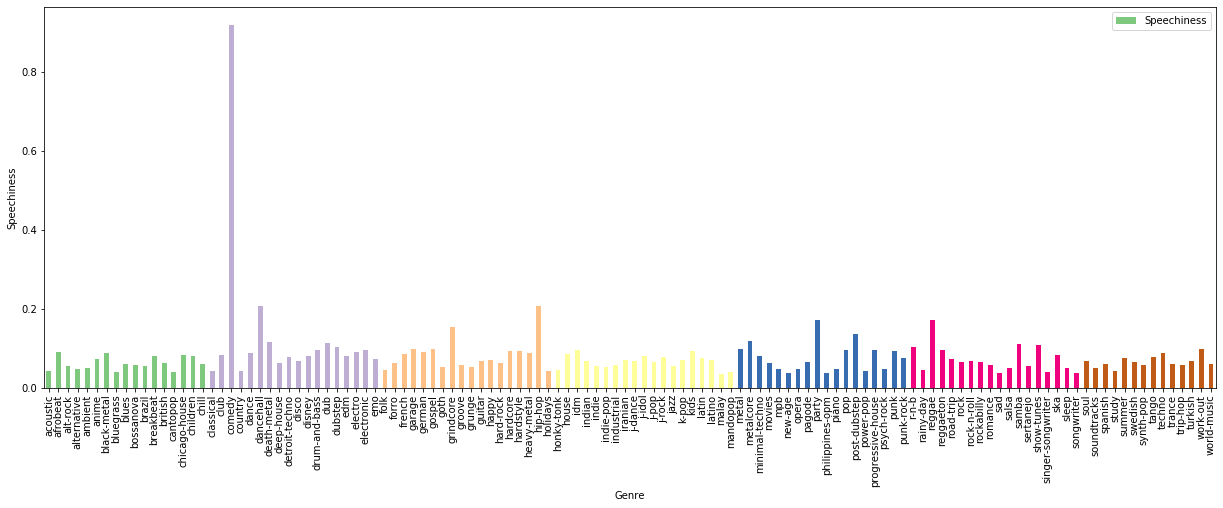

In [23]:
genre_population=audiofeature_dataframe[["Genre","Speechiness"]]
color = cm.Accent(np.linspace(0.01, 0.9, 130))
#color
ax = genre_population.plot.bar(x='Genre', y='Speechiness', rot=0,figsize=(21,7),color = color )
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel("Speechiness")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

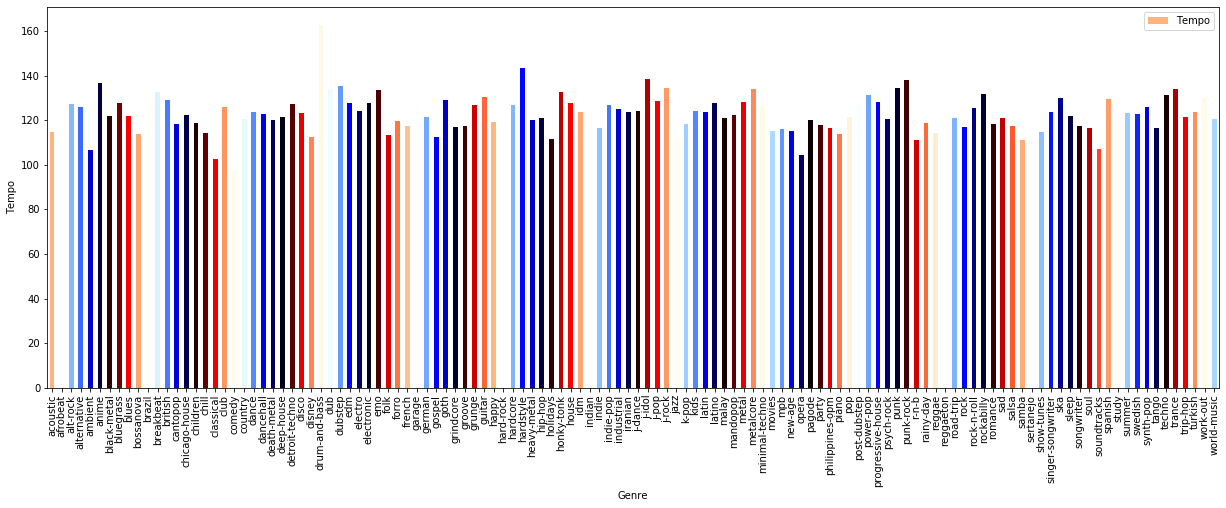

In [24]:
genre_population=audiofeature_dataframe[["Genre","Tempo"]]
color = cm.flag(np.linspace(0.01, 0.9, 130))
#color
ax = genre_population.plot.bar(x='Genre', y='Tempo', rot=0,figsize=(21,7),color = color )
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel("Tempo")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

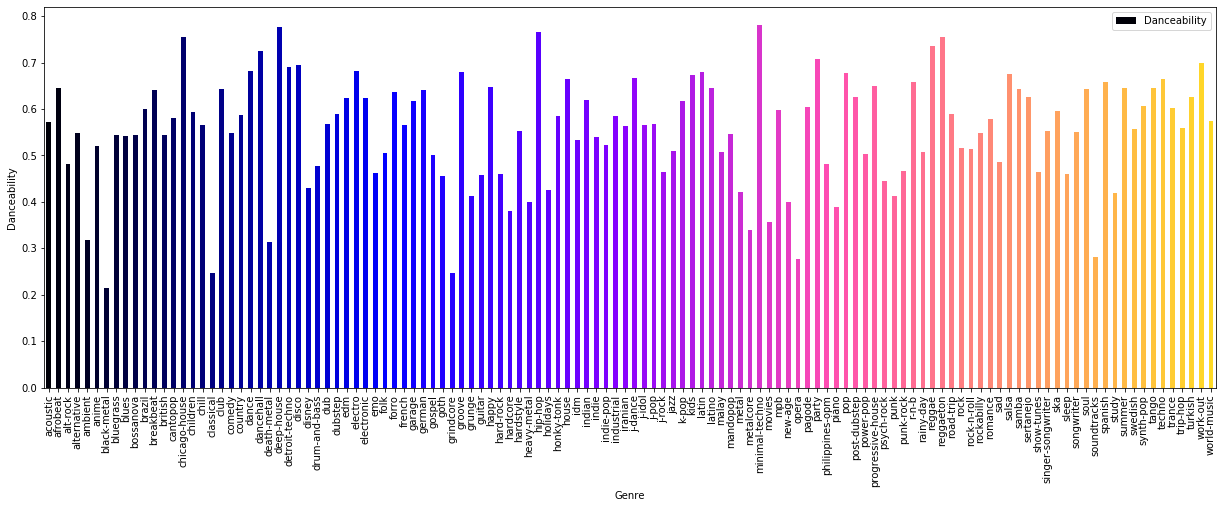

In [25]:
genre_population=audiofeature_dataframe[["Genre","Danceability"]]
color = cm.gnuplot2(np.linspace(0.01, 0.9, 130))
#color
ax = genre_population.plot.bar(x='Genre', y='Danceability', rot=0,figsize=(21,7),color = color )
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel("Danceability")
plt.show